<a href="https://colab.research.google.com/github/Goodnowcurr30/ML-and-DL-projects/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Let's download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [ ]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

## Dowload the Dataset

In [ ]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-12-14 19:22:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv!wget
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-12-14 19:22:45 ERROR 404: Not Found.

--2021-12-14 19:22:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv!wget
Reusing existing connection to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:443.
HTTP request sent, awaiting response... 404 Not Found
2021-12-14 19:22:45 ERROR 404: Not Found.

--2021-12-14 19:22:45--  

In [ ]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e9e11ee90>]],
      dtype=object)

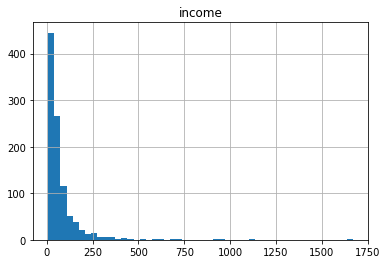

In [ ]:
df.hist(column='income', bins=50)

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the pandas data frame to numpy array.

In [ ]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [ ]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

## Normalize Data

Data standadization gives the data zero mean and unit variance. It is good for KNN algorithm

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 12) (800,)
Test set:  (200, 12) (200,)


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 13
# Train model and predict
nb = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
nb

KNeighborsClassifier(n_neighbors=13)

## Predicting

In [ ]:
y_pred = nb.predict(X_test)
y_pred[0:10]

array([3, 1, 1, 2, 4, 4, 3, 1, 3, 4])

## Accuracy Evaluation

In [ ]:
from sklearn import metrics
print('Train set accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Train set accuracy:  0.8125
Test set accuracy:  0.8


In [ ]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for i in range(1, ks):

  #train Model and predict
  nb = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)


  std_acc[n-1] = np.std(y_pred == y_test) / np.sqrt(y_pred.shape[0])

mean_acc

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

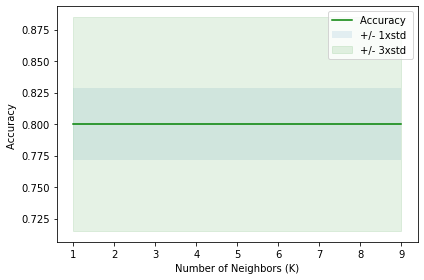